In [6]:
import pandas as pd

df = pd.read_csv("/Users/pranoysarath/PycharmProjects/pythonProject1/AI_FInal_project/seq_final.csv")
df

,Unnamed: 0,AssignmentId,story,sequentiality,wordcount,Analytic,Clout,Authentic,Tone,wordsPerSentence,...,differentiation,motion,space,time,pastfocus,presentfocus,sentence_length,realis_score,concretenes_score,story_type
2756,2756,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,"The day started perfectly, with a great drive ...",0.073307,183,52.16,36.93,83.55,98.59,11.44,...,1.09,3.28,8.20,6.01,11.48,1.09,902,0.809524,0.271739,recalled
2757,2757,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,"Five months ago, my niece and nephew were born...",0.046847,165,1.00,58.11,63.35,58.17,11.00,...,3.64,0.61,1.82,8.48,14.55,2.42,876,0.750000,0.250000,recalled
2758,2758,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,Burning Man metamorphoses was perfect. I am de...,0.046211,318,11.06,1.00,95.30,64.84,15.14,...,4.09,1.89,6.92,5.35,5.66,5.03,1615,0.750000,0.220126,recalled
2759,2759,3018Q3ZVOJCZJFDMPSFXATCQG1OARN,"Dear Diary,I would say this happened about 3 m...",0.089669,284,30.63,72.47,83.98,29.74,18.93,...,3.87,2.46,7.04,6.69,10.21,1.41,1474,0.775000,0.241135,recalled
2760,2760,304SM51WA4QG34IRAVFYVE1S8XNSBV,About a month ago me and my girlfriend went to...,0.052101,252,44.90,85.62,90.66,37.34,15.75,...,4.37,3.97,8.33,5.95,11.51,0.00,1325,0.870968,0.246032,recalled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,5530,3SKEMFQBZ4RZDN7C2AMMDQKHCV68K1,My dog was diagnosed with lymphoma a year ago ...,0.078590,293,7.21,5.63,90.22,10.17,11.72,...,3.07,3.41,8.19,5.80,12.63,0.00,1474,0.745098,0.255973,recalled
5531,5531,39PAAFCODNMWRITC4CBO6VRL6O4TV3,"Over my vacation from my job, I went to Casper...",0.169067,290,98.04,58.53,94.42,16.31,19.33,...,1.38,4.48,15.52,3.79,8.28,0.00,1593,0.723404,0.267361,recalled
5532,5532,3FE2ERCCZYU396R8MJGQ6TWGLSMOPR,This event was a birthday party for my nephew....,0.078642,162,21.07,95.53,20.50,99.00,10.13,...,1.23,3.70,4.94,6.79,13.58,2.47,845,0.833333,0.327160,recalled
5533,5533,3J88R45B2HKQ3F50NA3MP6N9XXKPXS,This event occurred about two weeks ago. I was...,0.054479,337,6.55,40.06,8.02,57.34,19.82,...,4.75,2.08,2.97,6.23,13.95,1.19,1773,0.861538,0.228916,recalled


In [9]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier


def xgboost_train(features):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_selection import SequentialFeatureSelector

    X = df[features]
    y = df[['story_type']]

    le = LabelEncoder()
    le.fit(['recalled', 'imagined'])


    from sklearn import preprocessing
    X_scaled = preprocessing.normalize(X, axis=0)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    X = X_scaled

    from sklearn.model_selection import train_test_split
    xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

    y_train_xg = le.transform(y_train)
    y_test_xg = le.transform(y_test)


    xgb_model.fit(X_train, y_train_xg)
    # print("Train score", xgb_model.score(X_train, y_train_xg))
    # print("Test score", xgb_model.score(X_test, y_test_xg))
    #
    #
    #
    # print("f1 score recalled", f1_score(xgb_model.predict(X_test), y_test_xg, pos_label=0))
    # print("f1 score Imagined", f1_score(xgb_model.predict(X_test), y_test_xg, pos_label=1))

    return {
        'train_score' : xgb_model.score(X_train, y_train_xg),
        'test_score' : xgb_model.score(X_test, y_test_xg),
        'f1_score_recalled' : f1_score(xgb_model.predict(X_test), y_test_xg, pos_label=0),
        'f1_score_Imagined' : f1_score(xgb_model.predict(X_test), y_test_xg, pos_label=1),
        'f1_score_weighted' : f1_score(xgb_model.predict(X_test), y_test_xg, average='weighted')
    }

In [10]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn import preprocessing

features =['sequentiality',
        'wordcount', 'Analytic', 'Clout', 'Authentic', 'Tone',
       'wordsPerSentence', 'BigWords', 'function', 'article', 'number',
       'preposition', 'conjunction', 'negation', 'cognitiveProcess', 'insight',
       'discrepancy', 'tentative', 'certitude', 'differentiation', 'motion',
       'space', 'time', 'pastfocus', 'presentfocus', 'sentence_length',
       'realis_score', 'concretenes_score']
X = df[features]

y = df[['story_type']]
X_mod = preprocessing.normalize(X, axis=0)
X_mod = pd.DataFrame(X_mod, columns=X.columns)
X  = X_mod
le = LabelEncoder()
le.fit(['recalled', 'imagined'])
y = le.transform(y)


output = []
for i in range(len(features)):
    print(f"Processing {i+1} features selection")
    rfe_selector = RFE(estimator=XGBClassifier(),n_features_to_select = i + 1, step = 1)
    rfe_selector.fit(X, y)
    cols = X.columns[rfe_selector.get_support()].to_list()
    output.append((cols,xgboost_train(cols)))

/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 1 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 2 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 3 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 4 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 5 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 6 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 7 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 8 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 9 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 10 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 11 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 12 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 13 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 14 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 15 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 16 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 17 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 18 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 19 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 20 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 21 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 22 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 23 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 24 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 25 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 26 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 27 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Processing 28 features selection


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


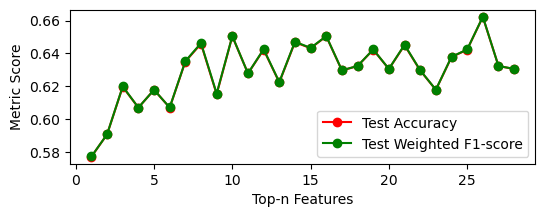

In [19]:
sorted_out = sorted(output, key = lambda x : x[1]['test_score'],  reverse=False)
# print(sorted_out[i][1]["test_score"])


train_accuracy = []
test_accuracy = []
f1_score_recalled = []
f1_score_imagined = []
f1_score_weighted = []

for i in range(len(sorted_out)):
    train_accuracy.append(output[i][1]["train_score"])
    test_accuracy.append(output[i][1]["test_score"])
    f1_score_recalled.append(output[i][1]['f1_score_recalled'])
    f1_score_imagined.append(output[i][1]['f1_score_Imagined'])
    f1_score_weighted.append(output[i][1]['f1_score_weighted'])

import matplotlib.pyplot as plt

x_axis = [x for x in range(1, len(sorted_out) + 1)]
# plt.plot(x_axis, train_accuracy, "o-", color="b", label="Train Accuracy")
plt.plot(x_axis, test_accuracy, "o-", color="r", label="Test Accuracy")
plt.plot(x_axis, f1_score_weighted, "o-", color="g", label="Weighted F1-score")
# plt.plot(x_axis, f1_score_imagined, "o-", color="b", label="Imagined F1-score")

plt.ylabel('Metric Score')
plt.xlabel('Top-n Features')
plt.legend()
plt.show()



In [12]:
sorted_out[-1][0]

(['sequentiality'],
 {'train_score': 0.7369015356820234,
  'test_score': 0.5772357723577236,
  'f1_score_recalled': 0.5706422018348624,
  'f1_score_Imagined': 0.5836298932384341,
  'f1_score_weighted': 0.5773765603404181})

In [73]:
sorted_out

[(['sequentiality'],
  {'train_score': 0.7369015356820234,
   'test_score': 0.5772357723577236,
   'f1_score_recalled': 0.5706422018348624,
   'f1_score_Imagined': 0.5836298932384341,
   'f1_score_weighted': 0.5773765603404181}),
 (['sequentiality', 'discrepancy'],
  {'train_score': 0.8150406504065041,
   'test_score': 0.5907859078590786,
   'f1_score_recalled': 0.5966162065894923,
   'f1_score_Imagined': 0.5847846012832263,
   'f1_score_weighted': 0.5908340038156079}),
 (['sequentiality', 'number', 'discrepancy', 'sentence_length'],
  {'train_score': 0.916892502258356,
   'test_score': 0.6070460704607046,
   'f1_score_recalled': 0.6126447016918968,
   'f1_score_Imagined': 0.6012832263978002,
   'f1_score_weighted': 0.6070922553196237}),
 (['sequentiality',
   'wordcount',
   'number',
   'discrepancy',
   'certitude',
   'sentence_length'],
  {'train_score': 0.9369918699186992,
   'test_score': 0.6070460704607046,
   'f1_score_recalled': 0.6147032772364924,
   'f1_score_Imagined': 0.5